# Load the dataset & Overview for the dataset

In [132]:
#Firstly, we will start by taking a look at our dataset.
#we will import pandas library so we can read the data.
import pandas as pd
#Now we will read the data and store it in a variable called NasaDataSet.
NasaDataSet = pd.read_csv('finalCopyyyyy.csv') 
#Now we will take a look about the Six rows by calling head function.
NasaDataSet.head(6)

,Asteroid_ID,Est_Diameter_Min,Est_Diameter_Max,Relative_Velocity,Miss_Distance,Absolute_Magnitude,Orbit_ID,Orbit_Uncertainty,Hazardous
0,2001566,1.427431,3.191832,76768.627248,5.188275e+07,16.35,102,0,True
1,2001862,1.594245,3.564839,54823.840852,1.125665e+07,16.11,285,0,True
2,2002063,0.930154,2.079888,34486.040716,1.819842e+07,17.28,115,0,False
3,2002100,1.508534,3.373184,52325.453650,6.817844e+07,16.23,182,0,False
4,2002340,0.228326,0.510552,74004.471912,3.818712e+07,20.33,60,0,True
5,2003361,0.352010,0.787118,17669.177336,4.351090e+07,19.39,96,0,True


In [133]:
#In shape function it will show us two paramerts, the first parameter will be the number of rows
#And in the second parameter will give us the number of columns 
NasaDataSet.shape

(1182, 9)

In [134]:
#Using the count function, we can specify the target class to calculate the number of true and false values
#helping us determine if our dataset is imbalanced or not. :)
NasaDataSet['Hazardous'].value_counts()

False    672
True     510
Name: Hazardous, dtype: int64

Based on this outcome, it's evident that the number of false instances exceeds the true ones, indicating an imbalanced dataset. Consequently, relying on accuracy as an evaluation metric may not provide accurate results, given the dataset's bias.

# EDA & Preprocessing 

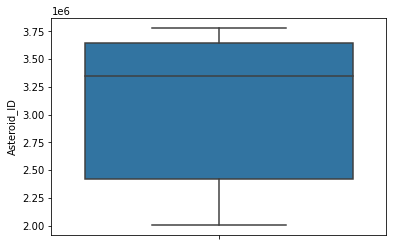

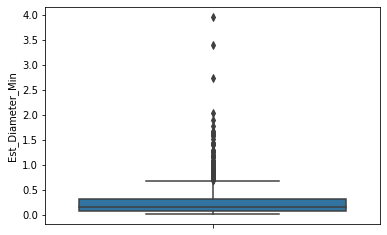

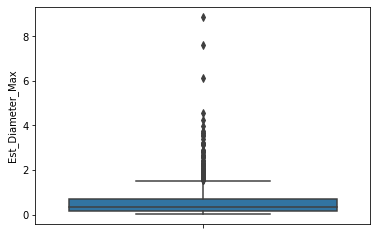

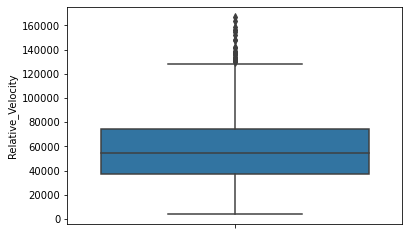

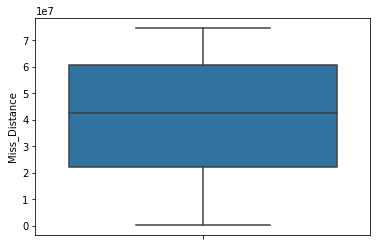

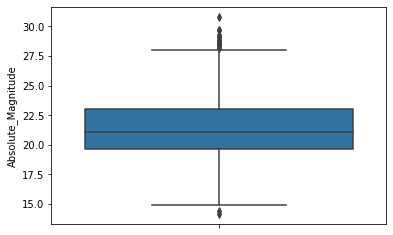

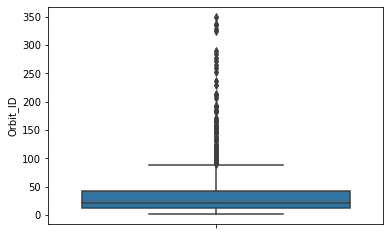

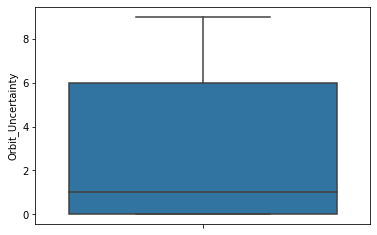

In [136]:
#Now we will do some visualization to see if our dataset in good quality or need some preprocessing!
#Firstly, we will create boxplots for each feature to identify any potential outliers in the dataset.
import matplotlib.pyplot as plt
import seaborn as sns
columns = ['Asteroid_ID', 'Est_Diameter_Min', 'Est_Diameter_Max', 'Relative_Velocity', 'Miss_Distance', 'Absolute_Magnitude','Orbit_ID', 'Orbit_Uncertainty']
for i in columns: 
    print("")
    # Plotting the boxplot for each variable
    ax = sns.boxplot(y=NasaDataSet[i])
    plt.show()

From the boxplot analysis, it's evident that outliers exist in certain features. For instance, in the Est_Diameter_Min feature, there is a data point significantly distant from the others. This visualization highlights the presence of outliers in some features, indicating a need to address this issue. :)

In [138]:
#Now we will remove the outliers from the columns that have outliers
import numpy as np
df = pd.DataFrame(NasaDataSet)
columns1 = ['Est_Diameter_Min', 'Est_Diameter_Max', 'Relative_Velocity', 'Absolute_Magnitude','Orbit_ID']
def remove_outliers(df, columns1):
    no_outliers = df.copy()
    for col in columns1:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        no_outliers = no_outliers[(no_outliers[col] > lower_limit) & (no_outliers[col] < upper_limit)]
    return no_outliers

columns_to_filter = ['Est_Diameter_Min', 'Est_Diameter_Max', 'Relative_Velocity', 'Absolute_Magnitude','Orbit_ID']
no_outliers = remove_outliers(NasaDataSet, columns_to_filter)

print("Original DataSet Shape:", NasaDataSet.shape)
print("DataSet Shape after Removing Outliers:", no_outliers.shape)

Original DataSet Shape: (1182, 9)
DataSet Shape after Removing Outliers: (1017, 9)


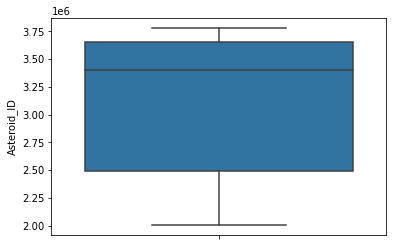

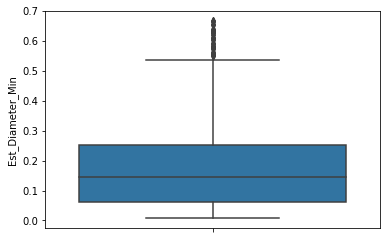

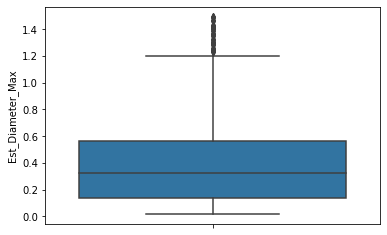

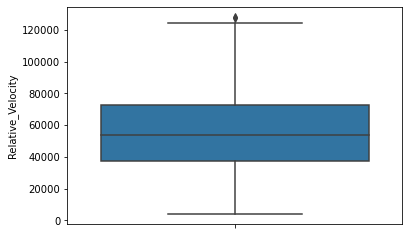

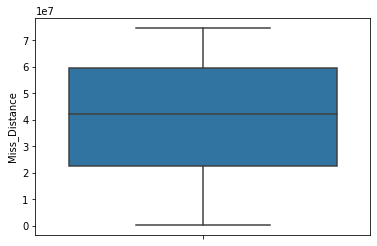

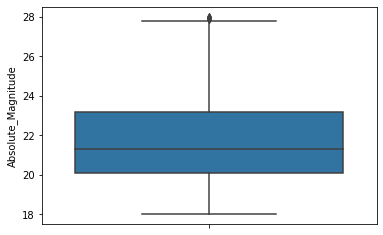

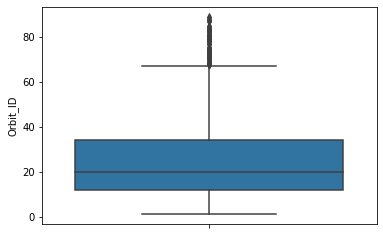

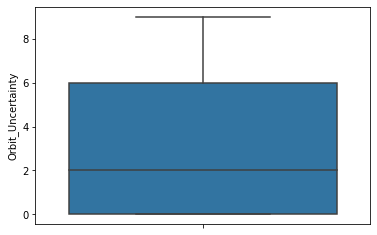

In [139]:
#Now we will see the boxblot after removing the outliers :)
for i in columns: 
    print("")
    # Plotting the boxplot for each variable
    ax = sns.boxplot(y=no_outliers[i])
    plt.show()

Now, comparing the dataset before and after addressing the outliers, we can confirm that the issue has been resolved. :D

In [141]:
#Check the number of true and false after removing the outliers
no_outliers['Hazardous'].value_counts()

False    598
True     419
Name: Hazardous, dtype: int64

In [142]:
#Now we will check if our data has missing values or not
df = pd.DataFrame(no_outliers)
if df.isnull().values.any():
    print("The DataSet has missing values :( ")
else:
    print("The DataSet doesn't have missing values :) ")

The DataSet doesn't have missing values :) 


This means that our data doesn't have any missing values :D

In [144]:
#Now we will ensure that our data doesn't have any duplicate record
# Check for duplicate rows
duplicates = df.duplicated()
# Count the number of duplicate rows
num_duplicates = duplicates.sum()
# Display the number of duplicate rows
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


From the result also we can know that our dataset doesn't have any duplicate rows :D

Now that we've cleaned our data and ensured its quality, we can proceed to the crucial step of building our models.

# Bulid the four models & Evaluate it with four performance metrics 

In [147]:
#Before diving into model building, our initial step is to separate the features into X and the target variable into y.
X = no_outliers.iloc[:, :-1].values #meaning that all the feature except the last one because it's the target.
y = no_outliers.iloc[:, 8].values #meaning that the last feature since Python indexing starts from 0.

# 1-AdaBoost "The Proposed Model"

In [148]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
# Split your data into train and test sets "we will use 70% as training and 30% as testing"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
# Fit AdaBoostClassifier() model with training data
AdaBoost_Model = AdaBoostClassifier()
AdaBoost_Model.fit(X_train, y_train)

AdaBoostClassifier()

In [149]:
# Make predictions for test data
y_pred = AdaBoost_Model.predict(X_test)

We will evaluate the performance of the model using precision, recall, f1-Score and ROC-AUC
We will not use the accuracy because our data is imbalance and the accuracy will not be accurate for imbalanced
dataset

In [150]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

print("-------------------------AdaBoost----------------------")
# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC:", roc_auc)

-------------------------AdaBoost----------------------
Precision: 0.7265625
Recall: 0.7380952380952381
F1-score: 0.7322834645669293
ROC-AUC: 0.7718253968253969


# 2- Logistic Regression "Baseline number 1"

In [151]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
from sklearn.linear_model import LogisticRegression 
LogesticRegression_Model = LogisticRegression()
LogesticRegression_Model.fit(X_train2, y_train2)

LogisticRegression()

In [152]:
# Make predictions for test data
y_pred2 = LogesticRegression_Model.predict(X_test2)

In [153]:
print("-------------------------Logestic Regression----------------------")
# Calculate precision
precision2 = precision_score(y_test2, y_pred2)
print("Precision:", precision2)

# Calculate recall
recall2 = recall_score(y_test2, y_pred2)
print("Recall:", recall2)

# Calculate F1-score
f12 = f1_score(y_test2, y_pred2)
print("F1-score:", f12)

# Calculate ROC-AUC
roc_auc2 = roc_auc_score(y_test2, y_pred2)
print("ROC-AUC:", roc_auc2)

-------------------------Logestic Regression----------------------
Precision: 0.6790123456790124
Recall: 0.4365079365079365
F1-score: 0.5314009661835749
ROC-AUC: 0.6460317460317461


# 3- Random Forest "Baseline number 2"

In [154]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
from sklearn.ensemble import RandomForestClassifier
RandomForest_Model = RandomForestClassifier()
RandomForest_Model.fit(X_train3, y_train3)

RandomForestClassifier()

In [155]:
# Make predictions for test data
y_pred3 = RandomForest_Model.predict(X_test3)

In [156]:
print("-------------------------Random Forest----------------------")
# Calculate precision
precision3 = precision_score(y_test3, y_pred3)
print("Precision:", precision3)

# Calculate recall
recall3 = recall_score(y_test3, y_pred3)
print("Recall:", recall3)

# Calculate F1-score
f13 = f1_score(y_test3, y_pred3)
print("F1-score:", f13)

# Calculate ROC-AUC
roc_auc3 = roc_auc_score(y_test3, y_pred3)
print("ROC-AUC:", roc_auc3)

-------------------------Random Forest----------------------
Precision: 0.7021276595744681
Recall: 0.7857142857142857
F1-score: 0.7415730337078651
ROC-AUC: 0.7761904761904761


# 4- Decision Tree "Baseline number 3"

In [157]:
#The fourth model "Baseline number 3": Decision Tree:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
from sklearn.tree import DecisionTreeClassifier
DecisionTree_Model = DecisionTreeClassifier()
DecisionTree_Model.fit(X_train4, y_train4)

DecisionTreeClassifier()

In [158]:
# Make predictions for test data
y_pred4 = DecisionTree_Model.predict(X_test4)

In [159]:
print("-------------------------Decision Tree----------------------")
# Calculate precision
precision4 = precision_score(y_test4, y_pred4)
print("Precision:", precision4)

# Calculate recall
recall4 = recall_score(y_test4, y_pred4)
print("Recall:", recall4)

# Calculate F1-score
f14 = f1_score(y_test4, y_pred4)
print("F1-score:", f14)

# Calculate ROC-AUC
roc_auc4 = roc_auc_score(y_test4, y_pred4)
print("ROC-AUC:", roc_auc4)

-------------------------Decision Tree----------------------
Precision: 0.7
Recall: 0.6666666666666666
F1-score: 0.6829268292682926
ROC-AUC: 0.7333333333333333


# Apply the StandardScaler and rebulid the models: 

After experimenting with various preprocessing methods, StandardScaler yielded the most favorable outcomes.

# 1-AdaBoost "The Proposed Model"

In [160]:
from sklearn import preprocessing
s_scaler = preprocessing.StandardScaler()
X_s = s_scaler.fit_transform(X)

In [161]:
X_train11, X_test11, y_train11, y_test11 = train_test_split(X_s,y, test_size = 0.3, random_state = 42, stratify = y)

In [162]:
AdaBoost_Model11 = AdaBoostClassifier()
AdaBoost_Model11.fit(X_train11, y_train11)

AdaBoostClassifier()

In [163]:
y_pred11 = AdaBoost_Model11.predict(X_test11)

In [174]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

print("-------------------------AdaBoost After Standard Scaler----------------------")
# Calculate precision
precision11 = precision_score(y_test11, y_pred11)
print("Precision:", precision11)

# Calculate recall
recall11 = recall_score(y_test11, y_pred11)
print("Recall:", recall)

# Calculate F1-score
f111 = f1_score(y_test11, y_pred11)
print("F1-score:", f111)

# Calculate ROC-AUC
roc_auc11 = roc_auc_score(y_test11, y_pred11)
print("ROC-AUC:", roc_auc11)

-------------------------AdaBoost After Standard Scaler----------------------
Precision: 0.7265625
Recall: 0.7380952380952381
F1-score: 0.7322834645669293
ROC-AUC: 0.7718253968253969


# 2- Logistic Regression "Baseline number 1"

In [165]:
X_train22, X_test22, y_train22, y_test22 = train_test_split(X_s, y, test_size=0.3, random_state=42, stratify=y)
from sklearn.linear_model import LogisticRegression 
LogesticRegression_Model22 = LogisticRegression()
LogesticRegression_Model22.fit(X_train22, y_train22)

LogisticRegression()

In [166]:
# Make predictions for test data
y_pred22 = LogesticRegression_Model22.predict(X_test22)

In [175]:
print("-------------------------Logestic Regression After Standard Scaler----------------------")
# Calculate precision
precision22 = precision_score(y_test22, y_pred22)
print("Precision:", precision22)

# Calculate recall
recall22 = recall_score(y_test22, y_pred22)
print("Recall:", recall22)

# Calculate F1-score
f122 = f1_score(y_test22, y_pred22)
print("F1-score:", f122)

# Calculate ROC-AUC
roc_auc22 = roc_auc_score(y_test22, y_pred22)
print("ROC-AUC:", roc_auc22)

-------------------------Logestic Regression After Standard Scaler----------------------
Precision: 0.680672268907563
Recall: 0.6428571428571429
F1-score: 0.6612244897959184
ROC-AUC: 0.7158730158730158


# 3- Random Forest "Baseline number 2"

In [168]:
X_train33, X_test33, y_train33, y_test33 = train_test_split(X_s, y, test_size=0.3, random_state=42, stratify=y)
from sklearn.ensemble import RandomForestClassifier
RandomForest_Model33 = RandomForestClassifier()
RandomForest_Model33.fit(X_train33, y_train33)

RandomForestClassifier()

In [169]:
# Make predictions for test data
y_pred33 = RandomForest_Model33.predict(X_test33)

In [176]:
print("-------------------------Random Forest After Standard Scaler----------------------")
# Calculate precision
precision33 = precision_score(y_test33, y_pred33)
print("Precision:", precision33)

# Calculate recall
recall33 = recall_score(y_test33, y_pred33)
print("Recall:", recall33)

# Calculate F1-score
f133 = f1_score(y_test33, y_pred33)
print("F1-score:", f133)

# Calculate ROC-AUC
roc_auc33 = roc_auc_score(y_test33, y_pred33)
print("ROC-AUC:", roc_auc33)

-------------------------Random Forest After Standard Scaler----------------------
Precision: 0.7132867132867133
Recall: 0.8095238095238095
F1-score: 0.7583643122676581
ROC-AUC: 0.7908730158730158


# 4- Decision Tree "Baseline number 3"

In [171]:
X_train44, X_test44, y_train44, y_test44 = train_test_split(X_s, y, test_size=0.3, random_state=42, stratify=y)
from sklearn.tree import DecisionTreeClassifier
DecisionTree_Model44 = DecisionTreeClassifier()
DecisionTree_Model44.fit(X_train44, y_train44)

DecisionTreeClassifier()

In [172]:
# Make predictions for test data
y_pred44 = DecisionTree_Model44.predict(X_test44)

In [177]:
print("-------------------------Decision Tree After Standard Scaler----------------------")
# Calculate precision
precision44 = precision_score(y_test44, y_pred44)
print("Precision:", precision44)

# Calculate recall
recall44 = recall_score(y_test44, y_pred44)
print("Recall:", recall44)

# Calculate F1-score
f144 = f1_score(y_test44, y_pred44)
print("F1-score:", f144)

# Calculate ROC-AUC
roc_auc44 = roc_auc_score(y_test44, y_pred44)
print("ROC-AUC:", roc_auc44)

-------------------------Decision Tree After Standard Scaler----------------------
Precision: 0.717948717948718
Recall: 0.6666666666666666
F1-score: 0.691358024691358
ROC-AUC: 0.7416666666666666


# Compare the outcomes pre and post StandardScaler 

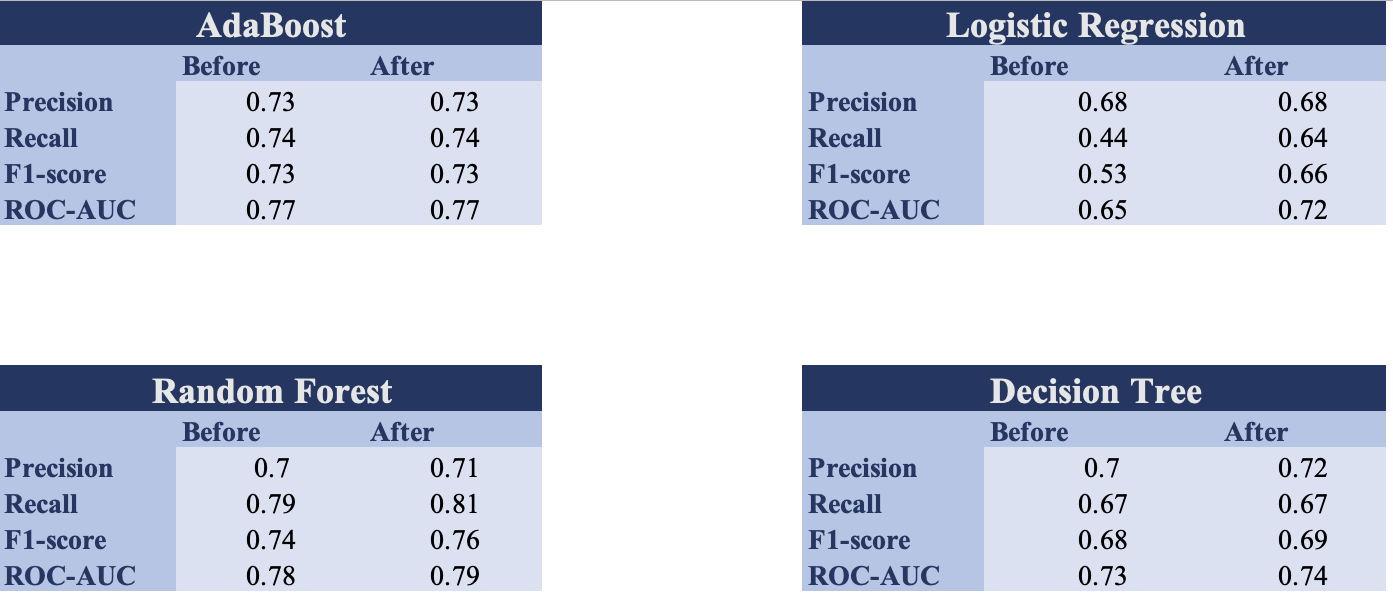

AdaBoost: The results remain unchanged following preprocessing.

Logistic Regression: All results showed improvement after preprocessing.

Random Forest: All results showed improvement after preprocessing. 

Decision Tree : All results showed improvement after preprocessing.

# Tune some parameters using GridSearchCV.
# reporting the optimal values of each parameter for each model.

# 1- Rebulid for AdaBoost Model

In [178]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(X_s, y, test_size=0.3, random_state=42, stratify=y)
AdaBoost_New = AdaBoostClassifier()
params = {'n_estimators': [50, 100, 150], 'learning_rate': [0.1, 0.5, 1]}

In [179]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(AdaBoost_New, params, cv=5)
grid.fit(X_train5, y_train5)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.5, 1],
                         'n_estimators': [50, 100, 150]})

In [180]:
print('Best hyperparameters:', grid.best_params_)

Best hyperparameters: {'learning_rate': 0.5, 'n_estimators': 150}


In [181]:
print("Best estimator:\n{}".format(grid.best_estimator_))

Best estimator:
AdaBoostClassifier(learning_rate=0.5, n_estimators=150)


In [182]:
# Rebuild a model on the training set using the optimum parameters' values
# evaluate the model on the test set
AdaBoostNeww = grid.best_estimator_
AdaBoostNeww.fit(X_train5, y_train5)
y_pred5 = AdaBoostNeww.predict(X_test5)

In [183]:
print("-------------------------AdaBoost After Optimal Values----------------------")
# Calculate precision
precision5 = precision_score(y_test5, y_pred5)
print("Precision:", precision5)

# Calculate recall
recall5 = recall_score(y_test5, y_pred5)
print("Recall:", recall5)

# Calculate F1-score
f15 = f1_score(y_test5, y_pred5)
print("F1-score:", f15)

# Calculate ROC-AUC
roc_auc5 = roc_auc_score(y_test5, y_pred5)
print("ROC-AUC:", roc_auc5)

-------------------------AdaBoost After Optimal Values----------------------
Precision: 0.7293233082706767
Recall: 0.7698412698412699
F1-score: 0.7490347490347491
ROC-AUC: 0.784920634920635


# 2- Rebulid for Logistic Regression Model

In [184]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(X_s, y, test_size=0.3, random_state=42, stratify=y)
LogisticRegression_New = LogisticRegression()
params2 = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

In [185]:
grid2 = GridSearchCV(LogisticRegression_New, params2, cv=5)
grid2.fit(X_train6, y_train6)

C:\Users\Gouda\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Gouda\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Gouda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Gouda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Gouda\anaconda3\lib\site-packages\sklearn\model_selection\_v

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']})

In [186]:
print('Best hyperparameters:', grid2.best_params_)

Best hyperparameters: {'C': 10, 'penalty': 'l2'}


In [187]:
print("Best estimator:\n{}".format(grid2.best_estimator_))

Best estimator:
LogisticRegression(C=10)


In [188]:
# Rebuild a model on the training set using the optimum parameters' values
# evaluate the model on the test set
LogisticNeww = grid2.best_estimator_
LogisticNeww.fit(X_train6, y_train6)
y_pred6 = LogisticNeww.predict(X_test6)

In [189]:
print("-------------------------Logistic Regression After Optimal Values----------------------")
# Calculate precision
precision6 = precision_score(y_test6, y_pred6)
print("Precision:", precision)

# Calculate recall
recall6 = recall_score(y_test6, y_pred6)
print("Recall:", recall)

# Calculate F1-score
f16 = f1_score(y_test6, y_pred6)
print("F1-score:", f1)

# Calculate ROC-AUC
roc_auc6 = roc_auc_score(y_test6, y_pred6)
print("ROC-AUC:", roc_auc6)

-------------------------Logistic Regression After Optimal Values----------------------
Precision: 0.7265625
Recall: 0.7380952380952381
F1-score: 0.7322834645669293
ROC-AUC: 0.732936507936508


# 3- Rebulid for Random Forest Model

In [190]:
X_train7, X_test7, y_train7, y_test7 = train_test_split(X_s, y, test_size=0.3, random_state=42, stratify=y)
RandomForest_New = RandomForestClassifier(random_state=42)
params3 = {'n_estimators': [10, 50, 100, 200],
          'max_depth': [None, 10, 20, 30],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4]}

In [191]:
grid3 = GridSearchCV(estimator=RandomForest_New, param_grid=params3, cv=5)
grid3.fit(X_train7, y_train7)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]})

In [192]:
print('Best hyperparameters:', grid3.best_params_)

Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [193]:
print("Best estimator:\n{}".format(grid3.best_estimator_))

Best estimator:
RandomForestClassifier(max_depth=20, n_estimators=50, random_state=42)


In [194]:
# Rebuild a model on the training set using the optimum parameters' values
# evaluate the model on the test set
RFNew = grid3.best_estimator_
RFNew.fit(X_train7, y_train7)
y_pred7 = RFNew.predict(X_test7)

In [195]:
print("-------------------------Random Forest After Optimal Values----------------------")
# Calculate precision
precision7 = precision_score(y_test7, y_pred7)
print("Precision:", precision7)

# Calculate recall
recall7 = recall_score(y_test7, y_pred7)
print("Recall:", recall7)

# Calculate F1-score
f17 = f1_score(y_test7, y_pred7)
print("F1-score:", f17)

# Calculate ROC-AUC
roc_auc7 = roc_auc_score(y_test7, y_pred7)
print("ROC-AUC:", roc_auc7)

-------------------------Random Forest After Optimal Values----------------------
Precision: 0.684931506849315
Recall: 0.7936507936507936
F1-score: 0.7352941176470589
ROC-AUC: 0.769047619047619


# 4- Rebulid for Decision Tree Model

In [197]:
X_train8, X_test8, y_train8, y_test8 = train_test_split(X_s, y, test_size=0.3, random_state=42, stratify=y)
dt = DecisionTreeClassifier(random_state=42)
params4 = {'max_depth': [None, 10, 20, 30],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4],
          'criterion': ['gini', 'entropy']}

In [198]:
grid4 = GridSearchCV(estimator=dt, param_grid=params4, cv=5)
grid4.fit(X_train8, y_train8)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [199]:
print('Best hyperparameters:', grid4.best_params_)

Best hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [200]:
print("Best estimator:\n{}".format(grid4.best_estimator_))

Best estimator:
DecisionTreeClassifier(min_samples_leaf=4, random_state=42)


In [201]:
# Rebuild a model on the training set using the optimum parameters' values
# evaluate the model on the test set
DTNeww = grid4.best_estimator_
DTNeww.fit(X_train8, y_train8)
y_pred8 = DTNeww.predict(X_test8)

In [202]:
print("-------------------------Decision Tree After Optimal Values----------------------")
# Calculate precision
precision8 = precision_score(y_test8, y_pred8)
print("Precision:", precision8)

# Calculate recall
recall8 = recall_score(y_test8, y_pred8)
print("Recall:", recall8)

# Calculate F1-score
f18 = f1_score(y_test8, y_pred8)
print("F1-score:", f18)

# Calculate ROC-AUC
roc_auc8 = roc_auc_score(y_test8, y_pred8)
print("ROC-AUC:", roc_auc8)

-------------------------Decision Tree After Optimal Values----------------------
Precision: 0.6923076923076923
Recall: 0.6428571428571429
F1-score: 0.6666666666666666
ROC-AUC: 0.7214285714285714


# Compare the performance for the four models using default parameter values and after tuning some parameters

# 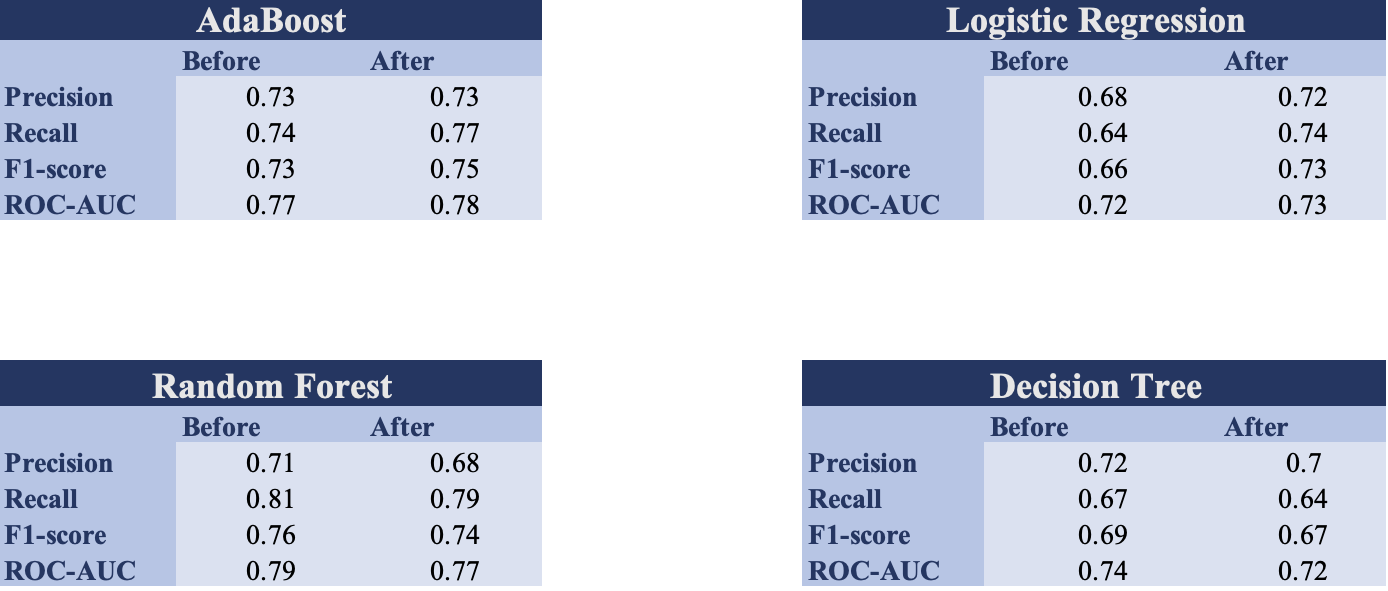

# AdaBoost

The improvements in recall, F1-Score, and ROC-AUC suggest that parameter tuning has enhanced the model's 
performance, particularly in correctly identifying true positives and in its ability to discriminate between positive and negative classes.
While precision remained the same, it didn't decrease, indicating that the tuning didn't 
negatively impact the model's ability to make accurate positive predictions.

# Logistic Regression

The improvements in precision, recall, F1-Score and ROC-AUC suggest that tuning the parameters of the Logistic 
Regression model has led to better performance, particularly in accurately identifying true positives.

# Random Forest

Based on these results, it seems that parameter tuning did not have a positive impact on the performance of 
the Random Forest model.
The precision, recall, F1-Score, and ROC-AUC performance seemed to drop.

# Decision Tree

Based on these results, it seems that parameter tuning also did not lead to an improvement in the performance of 
the Decision Tree model. In fact, there was a slight decrease in precision, recall, F1-Score, and ROC-AUC after
tuning the parameters.

# * Overall Conclusion *

In summary, the performance of different models varied following parameter tuning. AdaBoost showed improvement in key metrics such as recall, F1-Score, and ROC-AUC, indicating enhanced ability in correctly identifying true positives and class discrimination. Logistic Regression demonstrated significant enhancements across precision, recall, F1-Score, and ROC-AUC, particularly in accurately identifying true positives. Conversely, both Random Forest and Decision Tree models did not benefit from parameter tuning, as evidenced by a decline in precision, recall, F1-Score, and ROC-AUC metrics, indicating no improvement in performance.

# Confusion Matrix for AdaBoost Model after tunning

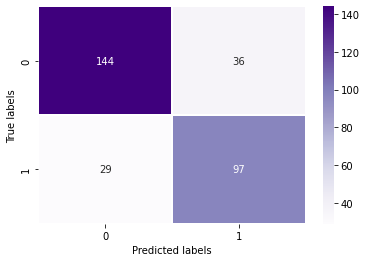

In [29]:
# Visualize confusion matrix
result2 = confusion_matrix(y_test5, y_pred5)
sns.heatmap(result2, annot=True, cmap='Purples', fmt="g", linewidth=2)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In the provided confusion matrix, with "0" representing "not hazard" and "1" denoting "hazard", we observed 97 True Positives (TP) where both the predicted and actual values indicated "hazard". Additionally, there were 144 True Negatives (TN) where both predicted and actual values were "not hazard". Furthermore, 36 False Positives (FP) occurred, indicating instances where predicted values were "hazard" but actual values were " not hazard". Finally, there were 29 False Negatives (FN), representing cases where predicted values were "not hazard" while actual values were "hazard".

# Thank You!